# import modules

In [1]:
import glob
import sys

sys.path.insert(0, "../")

from modules.Classes_ver2 import *
from modules.default_params_ver1 import *
from modules.functions_ver2 import *
from modules.contours_ver1_draft import *

# super contour data

In [2]:
# file_pattern = "../data/TACC_super_contour_mcz30_?_2024-05-19_*.pkl"
file_pattern = "../data/TACC_super_contour_mcz30_?_2024-06-12_*.pkl"
files = glob.glob(file_pattern)

data = {}

for file in files:
    with open(file, "rb") as f:
        file = pickle.load(f)
        data.update(file)

In [3]:
data = get_super_contour_stats(data, thres_factor=1.01, thres_diff=0)
data

{0.022121: {0.1: {'contour': {'omega_matrix': array([[0. , 0.1, 0.2, ..., 2.8, 2.9, 3. ],
           [0. , 0.1, 0.2, ..., 2.8, 2.9, 3. ],
           [0. , 0.1, 0.2, ..., 2.8, 2.9, 3. ],
           ...,
           [0. , 0.1, 0.2, ..., 2.8, 2.9, 3. ],
           [0. , 0.1, 0.2, ..., 2.8, 2.9, 3. ],
           [0. , 0.1, 0.2, ..., 2.8, 2.9, 3. ]]),
    'theta_matrix': array([[0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
           [0.125, 0.125, 0.125, ..., 0.125, 0.125, 0.125],
           [0.25 , 0.25 , 0.25 , ..., 0.25 , 0.25 , 0.25 ],
           ...,
           [7.75 , 7.75 , 7.75 , ..., 7.75 , 7.75 , 7.75 ],
           [7.875, 7.875, 7.875, ..., 7.875, 7.875, 7.875],
           [8.   , 8.   , 8.   , ..., 8.   , 8.   , 8.   ]]),
    'epsilon_matrix': array([[0.03795572, 0.03795572, 0.03795572, ..., 0.03795572, 0.03795572,
            0.03795572],
           [0.03775921, 0.03771506, 0.03761443, ..., 0.03495932, 0.03495951,
            0.03496463],
           [0.03757075, 0.03747865, 

# super contours

In [27]:
td_arr = np.sort(np.array([k for k in data.keys()]))
# I_arr = np.sort(data[td_arr[0]]["I_arr"])
I_arr = np.sort(np.array([round(I, 6) for I in data[td_arr[0]]["I_arr"]]))
X, Y = np.meshgrid(td_arr, I_arr)
src_params = data[td_arr[0]]["source_params"]

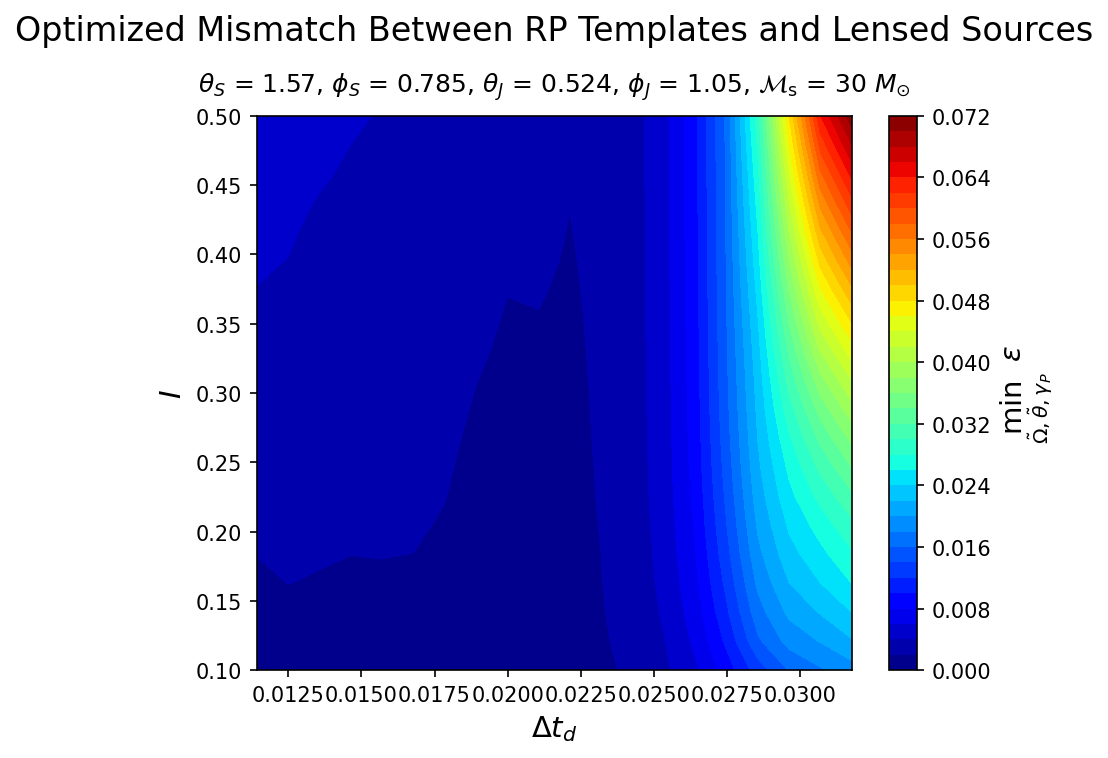

In [28]:
ep_min_mtx = np.zeros_like(X)

for c, td in enumerate(td_arr):
    for r, I in enumerate(I_arr):
        ep_min_mtx[r, c] = data[td][I]["stats"]["ep_min"]

plt.contourf(X, Y, ep_min_mtx, levels=40, cmap="jet")
plt.xlabel(r"$\Delta t_d$", fontsize=14)
plt.ylabel(r"$I$", fontsize=14)
plt.colorbar(cmap="jet", norm=colors.Normalize(vmin=0, vmax=1)).set_label(
    label=r"$\min_{\~\Omega, \~\theta, \gamma_P}$ $\epsilon$", size=14
)
plt.suptitle(
    "Optimized Mismatch Between RP Templates and Lensed Sources",
    fontsize=16,
    y=1.0215,
    x=0.435,
)

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        r"$\mathcal{M}_{\rm s}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
    ),
    fontsize=12,
    y=1.021,
)
plt.show()

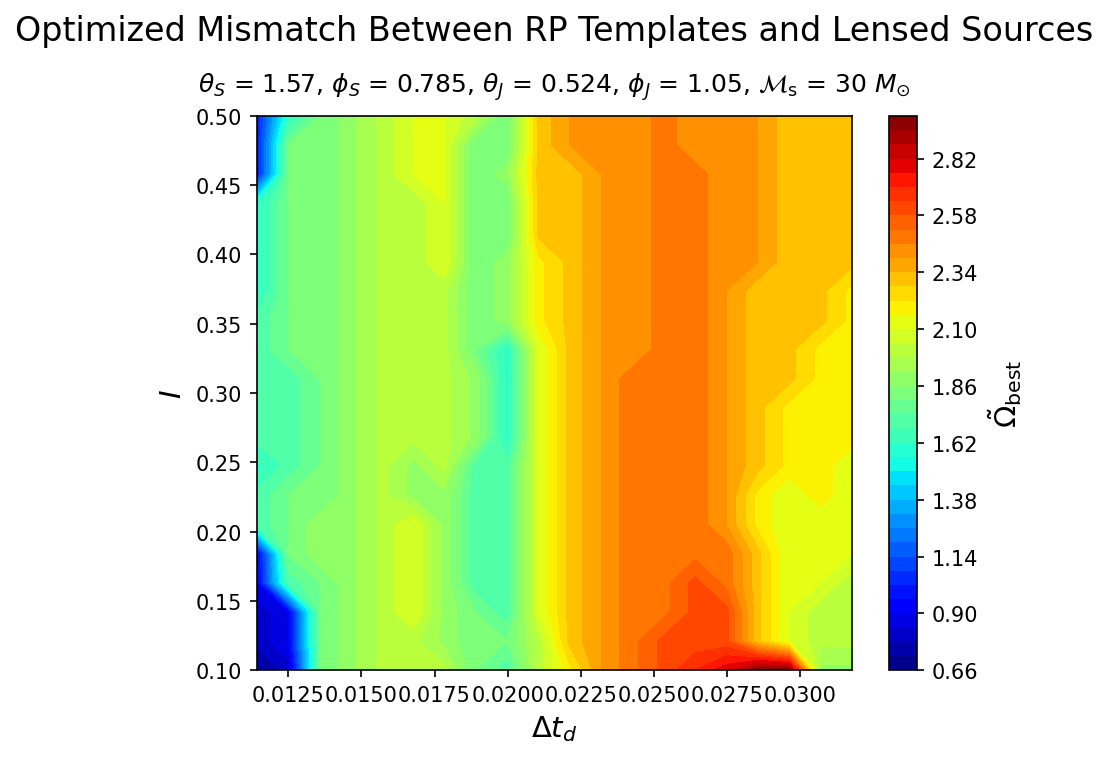

In [29]:
best_omega_mtx = np.zeros_like(X)

for c, td in enumerate(td_arr):
    for r, I in enumerate(I_arr):
        best_omega_mtx[r, c] = data[td][I]["stats"]["ep_min_omega_tilde"]

plt.contourf(X, Y, best_omega_mtx, levels=40, cmap="jet")
plt.xlabel(r"$\Delta t_d$", fontsize=14)
plt.ylabel(r"$I$", fontsize=14)
plt.colorbar(cmap="jet", norm=colors.Normalize(vmin=0, vmax=1)).set_label(
    label=r"$\~{\Omega}_{\rm best}$", size=14
)
plt.suptitle(
    "Optimized Mismatch Between RP Templates and Lensed Sources",
    fontsize=16,
    y=1.0215,
    x=0.435,
)

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        r"$\mathcal{M}_{\rm s}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
    ),
    fontsize=12,
    y=1.021,
)
plt.show()

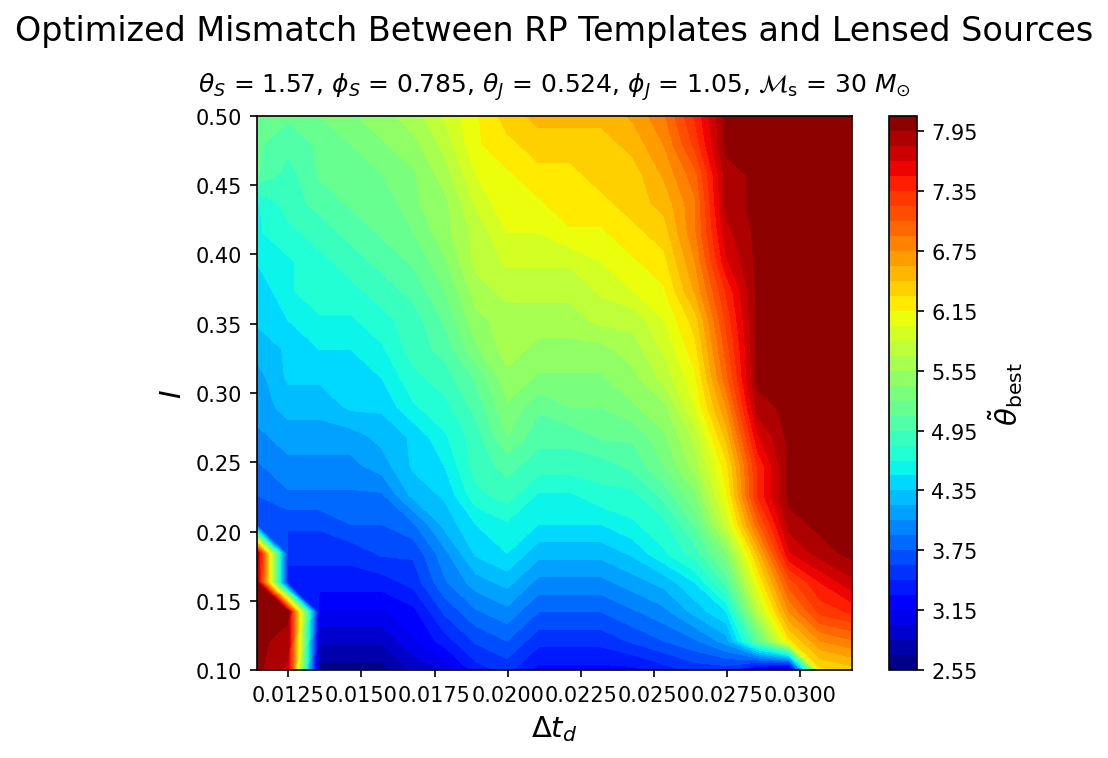

In [30]:
best_theta_mtx = np.zeros_like(X)

for c, td in enumerate(td_arr):
    for r, I in enumerate(I_arr):
        best_theta_mtx[r, c] = data[td][I]["stats"]["ep_min_theta_tilde"]

plt.contourf(X, Y, best_theta_mtx, levels=40, cmap="jet")
plt.xlabel(r"$\Delta t_d$", fontsize=14)
plt.ylabel(r"$I$", fontsize=14)
plt.colorbar(cmap="jet", norm=colors.Normalize(vmin=0, vmax=1)).set_label(
    label=r"$\~{\theta}_{\rm best}$", size=14
)
plt.suptitle(
    "Optimized Mismatch Between RP Templates and Lensed Sources",
    fontsize=16,
    y=1.0215,
    x=0.435,
)

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        r"$\mathcal{M}_{\rm s}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
    ),
    fontsize=12,
    y=1.021,
)
plt.show()

# as a function of $\Delta t_d$ while fixing $I$

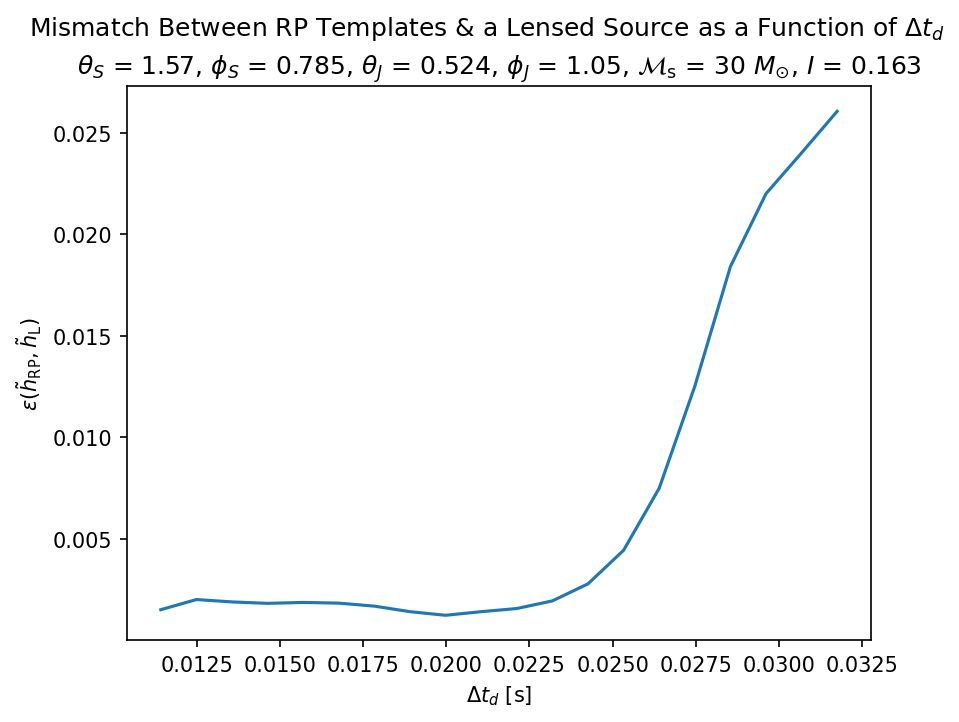

In [32]:
r = 3
td_ep_min_arr = ep_min_mtx[r, :]

plt.plot(td_arr, td_ep_min_arr, label=r"$\epsilon(\~h_{\rm RP}, \~h_{\rm L})$")
plt.xlabel(r"$\Delta t_d$ [s]")
plt.ylabel(r"$\epsilon(\~h_{\rm RP}, \~h_{\rm L})$")

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}, $I$ = {:.3g}".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        r"$\mathcal{M}_{\text{s}}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        I_arr[r],
    )
)

plt.suptitle(
    r"Mismatch Between RP Templates & a Lensed Source as a Function of $\Delta t_d$"
)

plt.show()

In [33]:
td_best_omega_arr = best_omega_mtx[r, :]
omega_min_err_mtx = np.zeros_like(X)
omega_max_err_mtx = np.zeros_like(X)

for x, td in enumerate(td_arr):
    for y, I in enumerate(I_arr):
        omega_min_err_mtx[y, x] = np.min(data[td][I]["stats"]["omega_tilde_err"])
        omega_max_err_mtx[y, x] = np.max(data[td][I]["stats"]["omega_tilde_err"])

omega_err_arr = np.array(
    [
        td_best_omega_arr - omega_min_err_mtx[r, :],
        omega_max_err_mtx[r, :] - td_best_omega_arr,
    ]
)

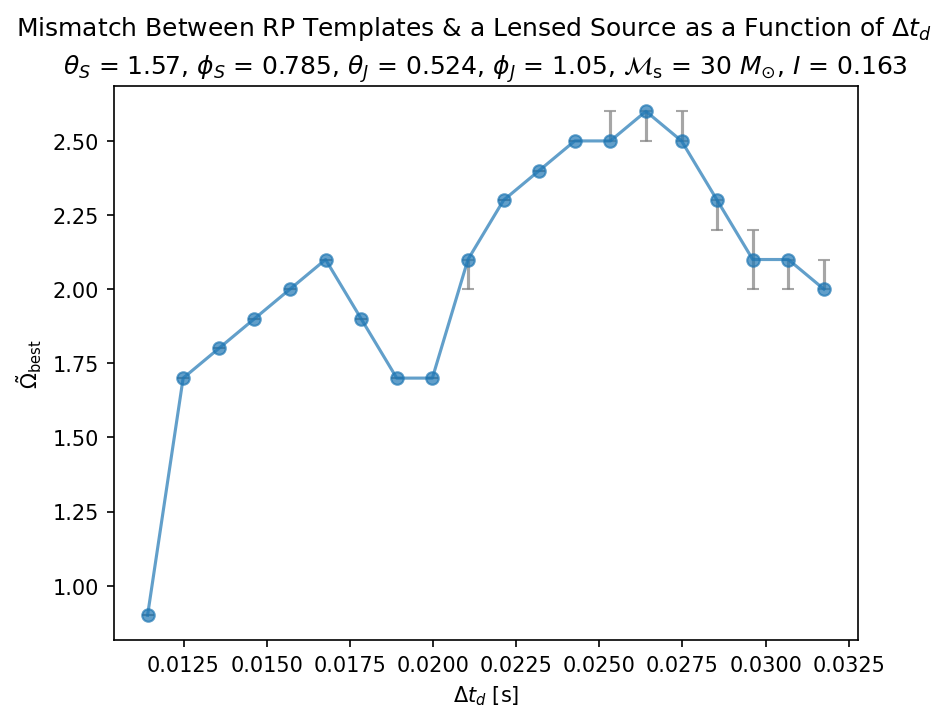

In [34]:
plt.errorbar(
    td_arr,
    td_best_omega_arr,
    yerr=omega_err_arr,
    fmt="-o",
    label=r"$\~{\Omega}_{\rm best}$",
    capsize=3,
    ecolor="grey",
    alpha=0.7,
)
plt.xlabel(r"$\Delta t_d$ [s]")
plt.ylabel(r"$\~{\Omega}_{\rm best}$")

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}, $I$ = {:.3g}".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        r"$\mathcal{M}_{\text{s}}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        I_arr[r],
    )
)

plt.suptitle(
    r"Mismatch Between RP Templates & a Lensed Source as a Function of $\Delta t_d$"
)

plt.show()

In [35]:
td_best_theta_arr = best_theta_mtx[r, :]
theta_min_err_mtx = np.zeros_like(X)
theta_max_err_mtx = np.zeros_like(X)

for x, td in enumerate(td_arr):
    for y, I in enumerate(I_arr):
        theta_min_err_mtx[y, x] = np.min(data[td][I]["stats"]["theta_tilde_err"])
        theta_max_err_mtx[y, x] = np.max(data[td][I]["stats"]["theta_tilde_err"])

theta_err_arr = np.array(
    [
        td_best_theta_arr - theta_min_err_mtx[r, :],
        theta_max_err_mtx[r, :] - td_best_theta_arr,
    ]
)

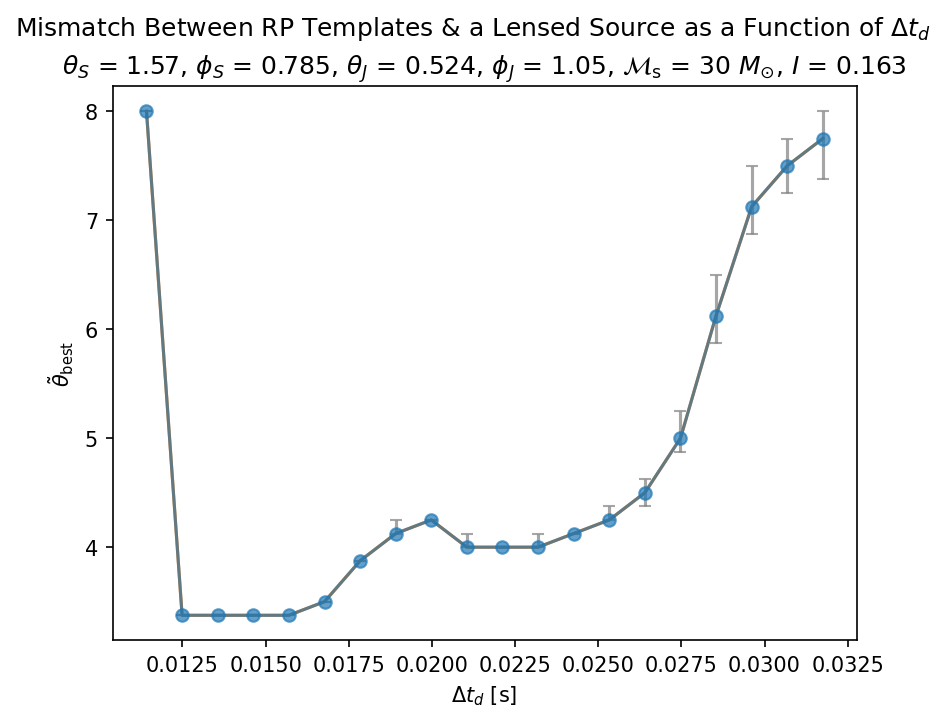

In [36]:
plt.errorbar(
    td_arr,
    td_best_theta_arr,
    yerr=theta_err_arr,
    fmt="-o",
    label=r"$\~{\theta}_{\rm best}$",
    capsize=3,
    ecolor="grey",
    alpha=0.7,
)
plt.plot(td_arr, td_best_theta_arr, label=r"$\~{\theta}_{\rm best}$")
plt.xlabel(r"$\Delta t_d$ [s]")
plt.ylabel(r"$\~{\theta}_{\rm best}$")

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}, $I$ = {:.3g}".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        r"$\mathcal{M}_{\text{s}}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        I_arr[r],
    )
)

plt.suptitle(
    r"Mismatch Between RP Templates & a Lensed Source as a Function of $\Delta t_d$"
)

plt.show()

IntSlider(value=19, description='td index:', max=19)

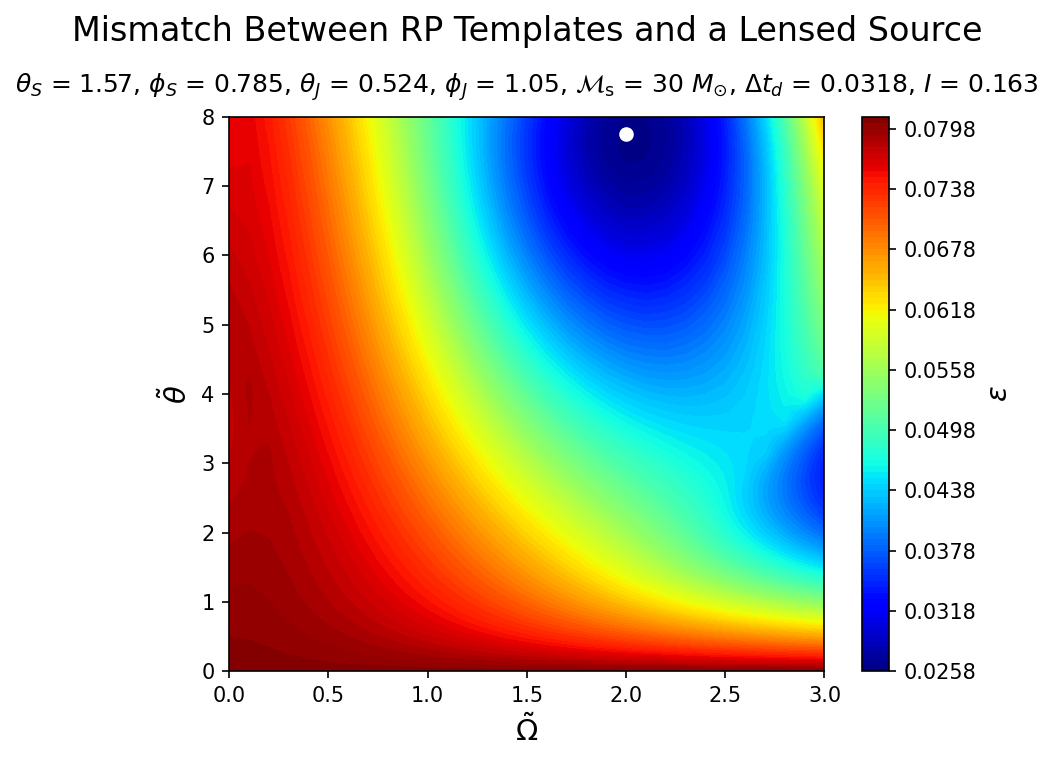

In [43]:
from IPython.display import clear_output

# Assuming td_arr and I_arr[r] are defined and have the same length
td_slider = widgets.IntSlider(
    min=0, max=len(td_arr) - 1, step=1, value=0, description="td index:"
)
display(td_slider)


def update_plot(val):
    clear_output(wait=True)
    display(td_slider)
    td = td_arr[val["new"]]
    plot_indiv_contour_from_dict(data[td], I_arr[r])


td_slider.observe(update_plot, names="value")

# as a function of $I$ while fixing $\Delta t_d$

In [37]:
c = 10
data_I = data[td_arr[c]]

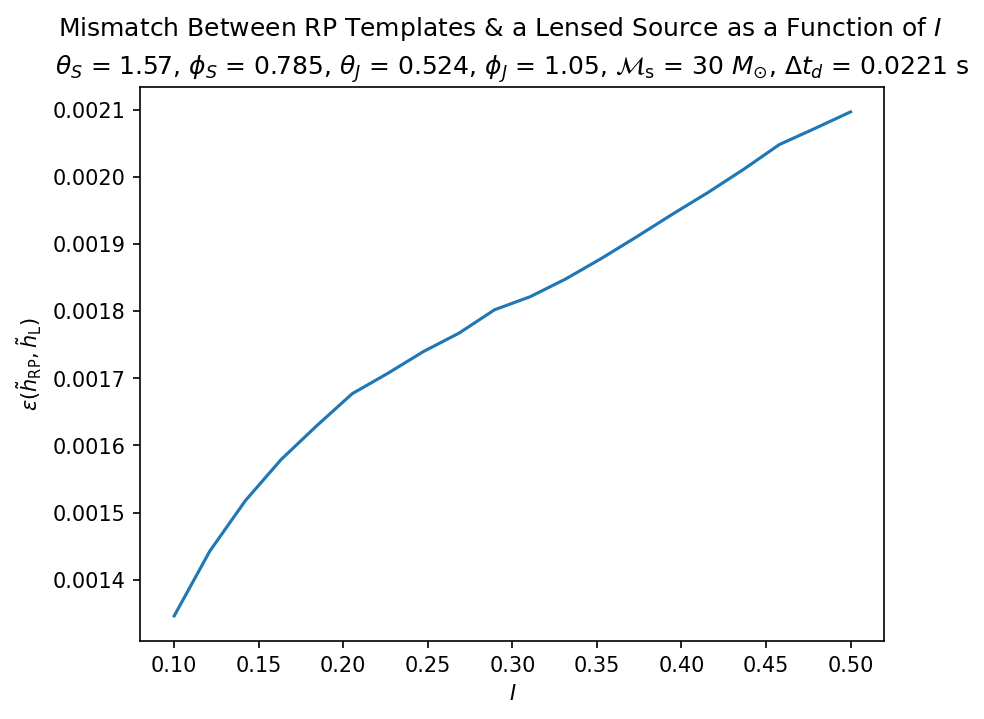

In [38]:
I_ep_min_arr = np.array([data_I[I]["stats"]["ep_min"] for I in I_arr])

plt.plot(I_arr, I_ep_min_arr, label=r"$\epsilon(\~h_{\rm RP}, \~h_{\rm L})$")
plt.xlabel(r"$I$")
plt.ylabel(r"$\epsilon(\~h_{\rm RP}, \~h_{\rm L})$")

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}, $\Delta t_d$ = {:.3g} s".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        r"$\mathcal{M}_{\text{s}}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        data_I["td"],
    )
)

plt.suptitle(r"Mismatch Between RP Templates & a Lensed Source as a Function of $I$")

plt.show()

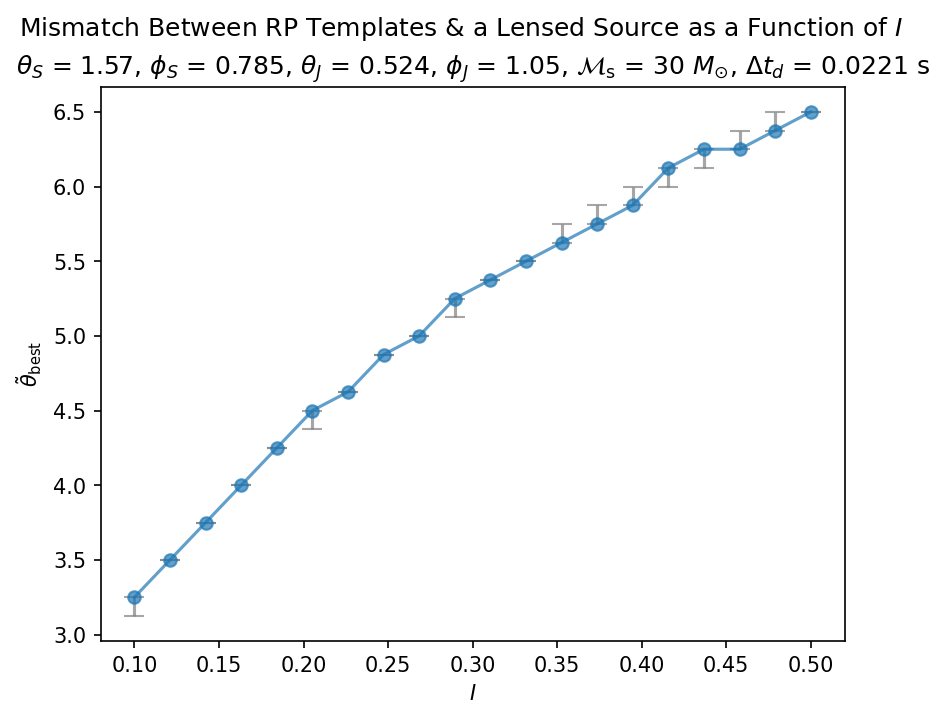

In [39]:
I_best_theta_arr = np.array([data_I[I]["stats"]["ep_min_theta_tilde"] for I in I_arr])

plt.errorbar(
    I_arr,
    I_best_theta_arr,
    yerr=get_asym_err(data_I, I_arr, "theta_tilde"),
    fmt="-o",
    label=r"$\~{\theta}_{\rm best}$",
    capsize=5,
    ecolor="grey",
    alpha=0.7,
)

plt.xlabel(r"$I$")
plt.ylabel(r"$\~{\theta}_{\rm best}$")

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}, $\Delta t_d$ = {:.3g} s".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        r"$\mathcal{M}_{\text{s}}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        data_I["td"],
    )
)

plt.suptitle(r"Mismatch Between RP Templates & a Lensed Source as a Function of $I$")

plt.show()

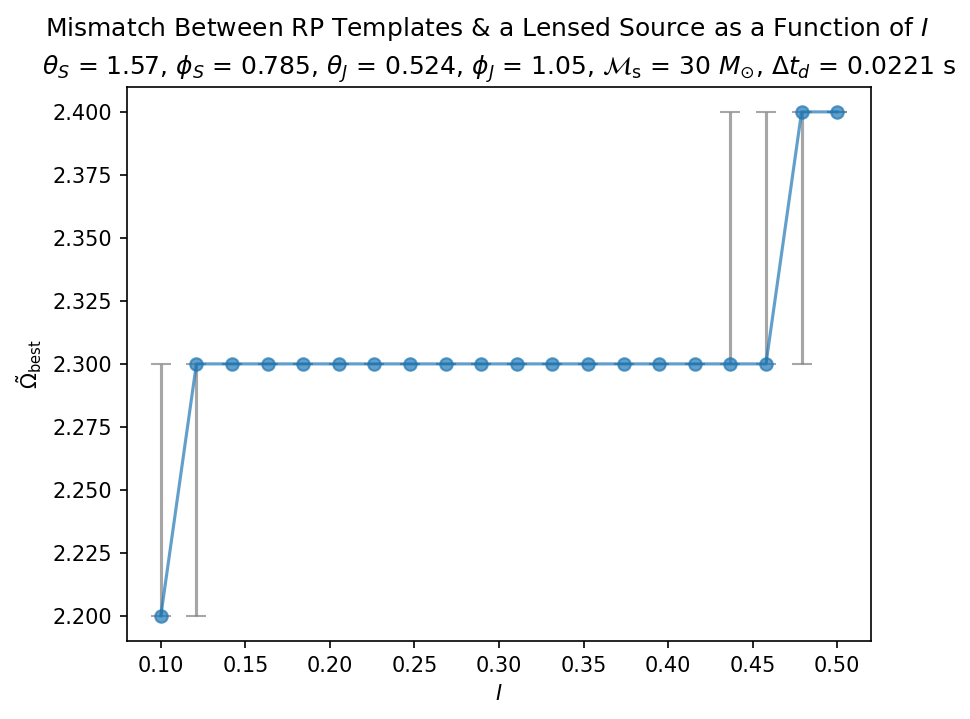

In [40]:
I_best_omega_arr = np.array([data_I[I]["stats"]["ep_min_omega_tilde"] for I in I_arr])

plt.errorbar(
    I_arr,
    I_best_omega_arr,
    yerr=get_asym_err(data_I, I_arr, "omega_tilde"),
    fmt="-o",
    label=r"$\~{\Omega}_{\rm best}$",
    capsize=5,
    ecolor="grey",
    alpha=0.7,
)

plt.xlabel(r"$I$")
plt.ylabel(r"$\~{\Omega}_{\rm best}$")

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}, $\Delta t_d$ = {:.3g} s".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        r"$\mathcal{M}_{\text{s}}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        data_I["td"],
    )
)

plt.suptitle(r"Mismatch Between RP Templates & a Lensed Source as a Function of $I$")

plt.show()

IntSlider(value=19, description='I index:', max=19)

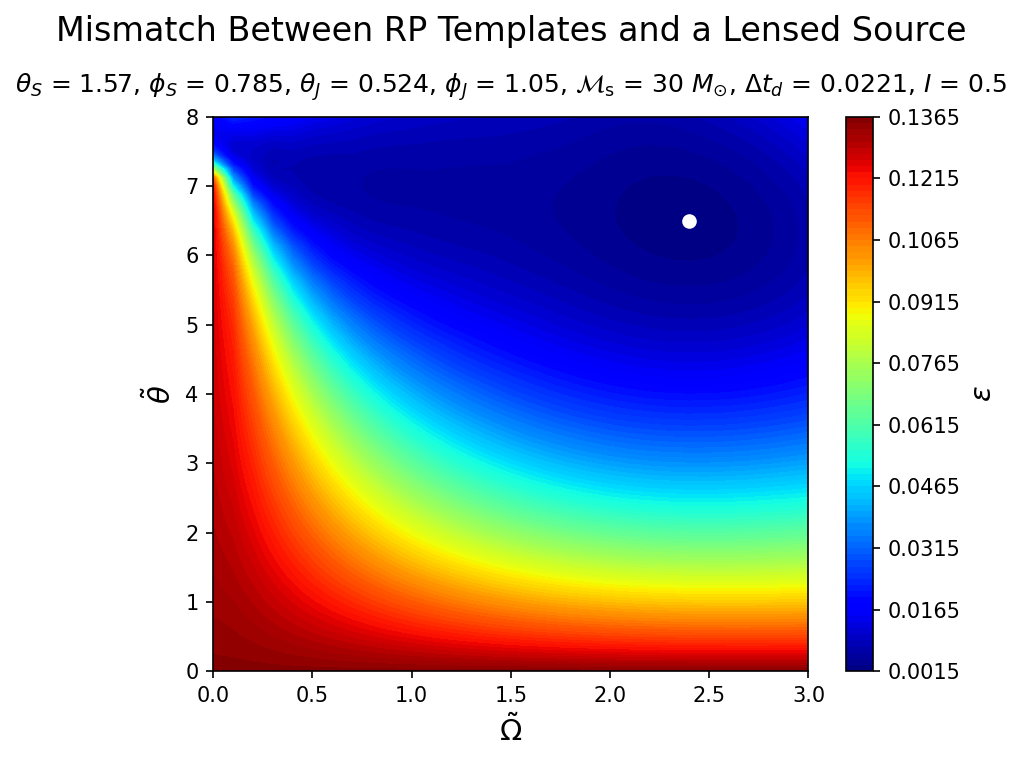

In [42]:
from IPython.display import clear_output

# Assuming td_arr and I_arr[r] are defined and have the same length
I_slider = widgets.IntSlider(
    min=0, max=len(I_arr) - 1, step=1, value=0, description="I index:"
)
display(I_slider)


def update_plot(val):
    clear_output(wait=True)
    display(I_slider)
    I = I_arr[val["new"]]
    plot_indiv_contour_from_dict(data[td_arr[c]], I)  # type: ignore


I_slider.observe(update_plot, names="value")

# waveform comparison

In [ ]:
data_td = {}
lens_params_2 = data_td["source_params"]
RP_params_2 = copy.deepcopy(RP_params_1)
RP_params_2["mcz"] = lens_params_2["mcz"]

MLz_arr = data_td["MLz_arr"]
td_arr = data_td["td_arr"]

for i in range(0, len(MLz_arr), 20):
    lens_params, RP_params = set_to_params(lens_params_2, RP_params_2)
    lens_params["MLz"] = MLz_arr[i] * solar_mass
    RP_params["omega_tilde"] = data_td[td_arr[i]]["stats"]["ep_min_omega_tilde"]
    RP_params["theta_tilde"] = data_td[td_arr[i]]["stats"]["ep_min_theta_tilde"]
    RP_params["gamma_P"] = data_td[td_arr[i]]["stats"]["ep_min_gammaP"]

    plot_waveform_comparison(RP_params, lens_params, get_updated_mismatch_results=True)
    plt.show()

In [ ]:
lens_params_2 = data_I["source_params"]
RP_params_2 = copy.deepcopy(RP_params_1)
RP_params_2["mcz"] = lens_params_2["mcz"]

y_arr = data_I["y_arr"]
MLz_arr = data_I["MLz_arr"]
I_arr = data_I["I_arr"]

for i in range(0, len(y_arr), 2):
    lens_params, RP_params = set_to_params(lens_params_2, RP_params_2)
    lens_params["y"] = y_arr[i]
    lens_params["MLz"] = MLz_arr[i] * solar_mass
    RP_params["omega_tilde"] = data_I[I_arr[i]]["stats"]["ep_min_omega_tilde"]
    RP_params["theta_tilde"] = data_I[I_arr[i]]["stats"]["ep_min_theta_tilde"]
    RP_params["gamma_P"] = data_I[I_arr[i]]["stats"]["ep_min_gammaP"]

    plot_waveform_comparison(RP_params, lens_params, get_updated_mismatch_results=True)
    plt.show()